In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  # accessor needed to parse crs
import calendar
import argparse
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob

In [37]:
case = 'case1'


profile = xr.open_dataset(case+'/profiles.001.nc')
tmser = xr.open_dataset(case+'/tmser.001.nc')

profile

<xarray.Dataset>
Dimensions:    (zt: 64, zm: 64, zts: 4, time: 120)
Coordinates:
  * zt         (zt) float32 2.0 6.0 10.0 14.0 18.0 ... 242.0 246.0 250.0 254.0
  * zm         (zm) float32 0.0 4.0 8.0 12.0 16.0 ... 240.0 244.0 248.0 252.0
  * zts        (zts) float32 -0.035 -0.175 -0.64 -1.945
  * time       (time) float32 300.0 600.0 900.0 ... 3.54e+04 3.57e+04 3.6e+04
Data variables: (12/69)
    rhof       (time, zt) float32 ...
    rhobf      (time, zt) float32 ...
    rhobh      (time, zm) float32 ...
    presh      (time, zt) float32 ...
    u          (time, zt) float32 ...
    v          (time, zt) float32 ...
    ...         ...
    sbdiss     (time, zt) float32 ...
    sbstor     (time, zt) float32 ...
    sbbudg     (time, zt) float32 ...
    sbresid    (time, zt) float32 ...
    ekm        (time, zt) float32 ...
    khkm       (time, zt) float32 ...
Attributes:
    title:    profiles.001.nc
    history:  Created on 20230531 at 183006.106
    Source:   DALES 4.4 git: v4.4
    Author:

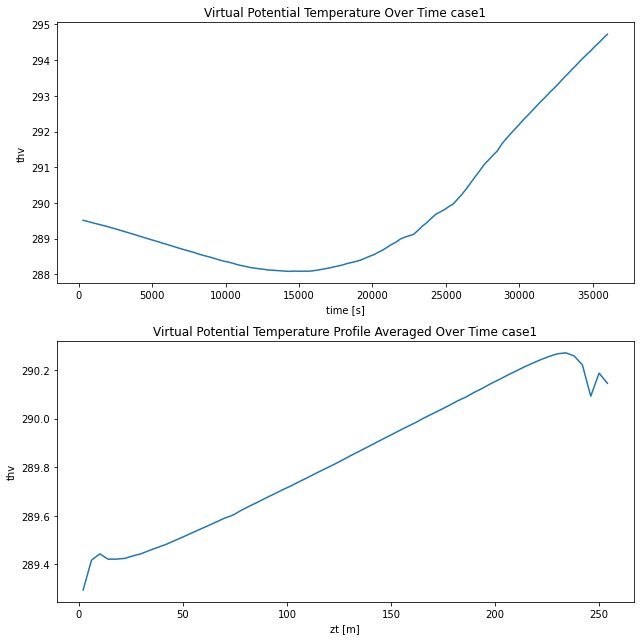

In [35]:
fig, axs = plt.subplots(nrows=2, figsize = (9, 9))
plot1 = profile.mean(dim = ['zt']).thv.plot(ax=axs[0])
plot2 = profile.mean(dim = ['time']).thv.plot(ax=axs[1])
plt.tight_layout()
axs[0].set_title('Virtual Potential Temperature Over Time ' +case)
axs[1].set_title('Virtual Potential Temperature Profile Averaged Over Time '+case)
plt.tight_layout()
plt.show()

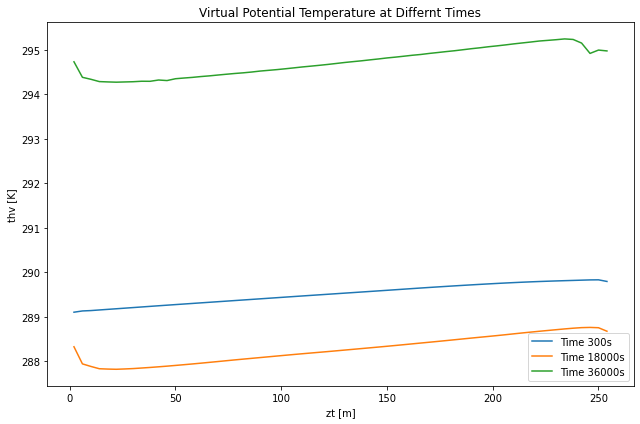

In [50]:
time_steps = [300, 18000, 36000]  # Example time steps

# Create subplots
fig, axs = plt.subplots(nrows=1, figsize=(9, 6))

# Plot each time step with labels
for time_step in time_steps:
    profile.sel(time=[time_step]).thv.plot(ax=axs, label=f'Time {time_step}s')

# Add any necessary customizations
plt.tight_layout()
axs.set_title('Virtual Potential Temperature at Differnt Times')
axs.legend()

# Show the plot
plt.show()

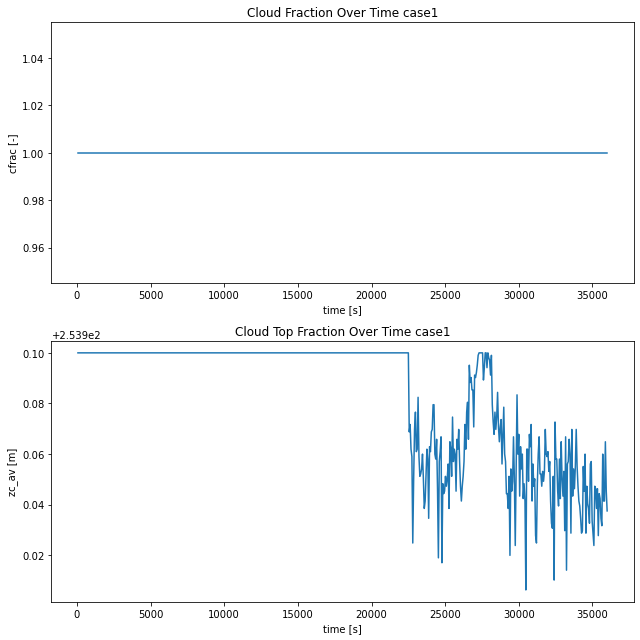

In [36]:
fig, axs = plt.subplots(nrows=2, figsize = (9, 9))
plot1 = tmser.cfrac.plot(ax=axs[0])
plot2 = tmser.zc_av.plot(ax=axs[1])
plt.tight_layout()
axs[0].set_title('Cloud Fraction Over Time '+case)
axs[1].set_title('Cloud Top Fraction Over Time '+case)
plt.tight_layout()
plt.show()